In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('C:/Users/cmscomputers/Desktop/datasets/Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
print('Percentage of churn_rate\n',df['Churn'].value_counts()/len(df['Churn'])*100), 
print('='*40)
print('Total values\n',df['Churn'].value_counts())

Percentage of churn_rate
 No     73.463013
Yes    26.536987
Name: Churn, dtype: float64
Total values
 No     5174
Yes    1869
Name: Churn, dtype: int64


In [62]:
#Tenure column is in months ,so we can make tenure groups

In [8]:
df.tenure.max()

72

In [9]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [12]:
df['tenure_group']=df['tenure_group'].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df1=df.drop(['customerID','tenure'],axis=1)

In [15]:
cat=[]
con=[]
for i in df1.columns:
    if(df1[i].dtype=='object'):
        cat.append(i)
    else:
        con.append(i)

# Exploratory data analysis

Text(0.5, 1.0, 'Churn count')

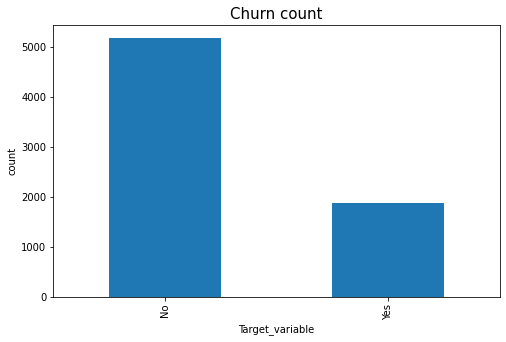

In [17]:
df1['Churn'].value_counts().plot(kind='bar',figsize=(8,5))
plt.ylabel('count',size=10)
plt.xlabel('Target_variable',size=10)
plt.title('Churn count',size=15)

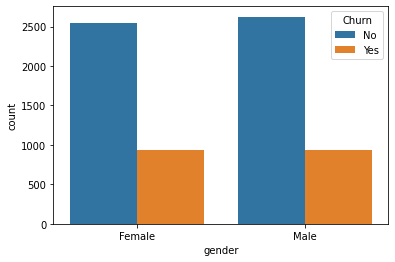

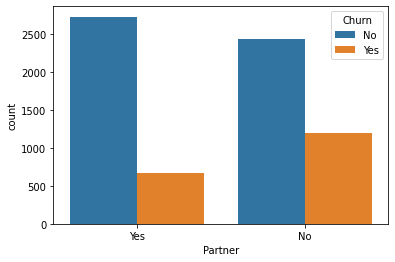

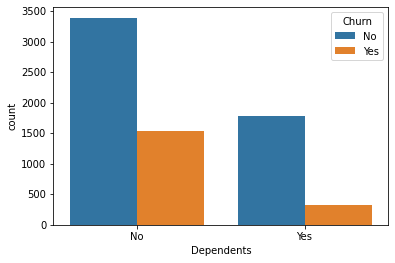

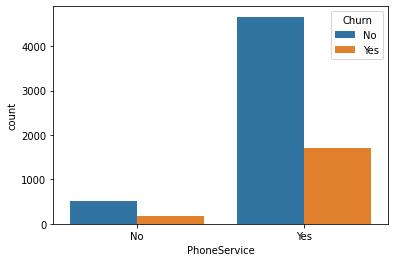

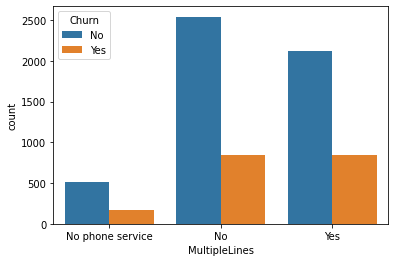

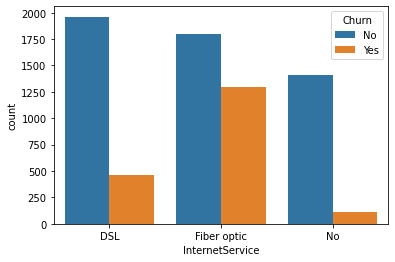

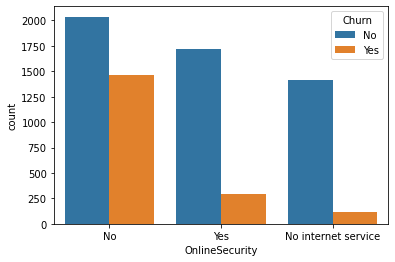

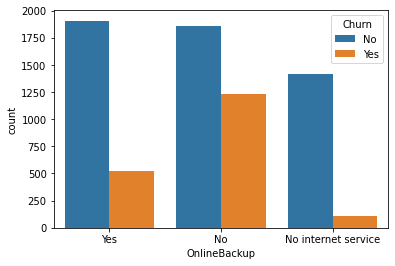

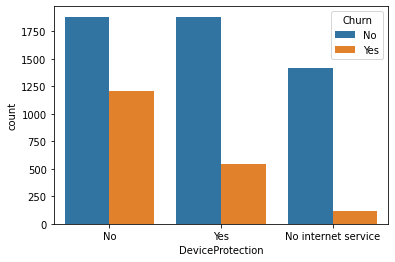

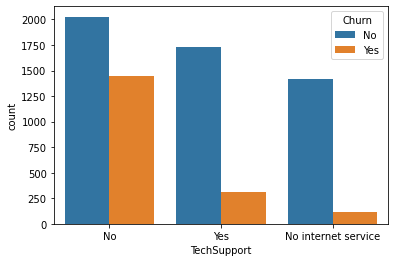

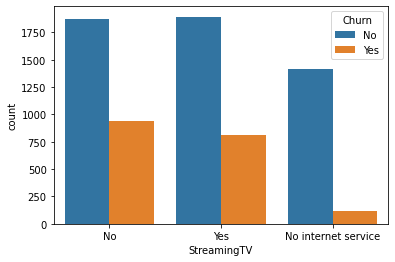

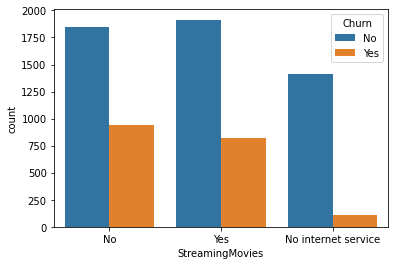

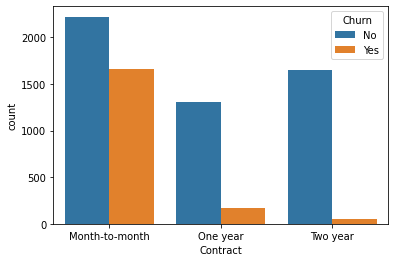

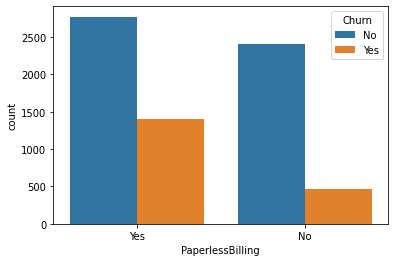

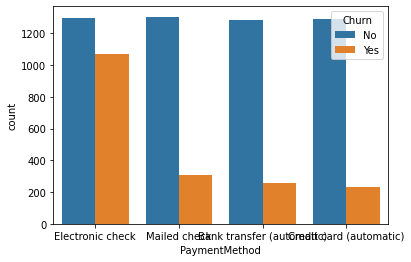

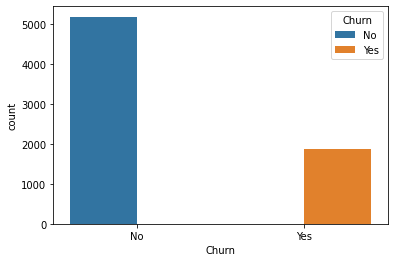

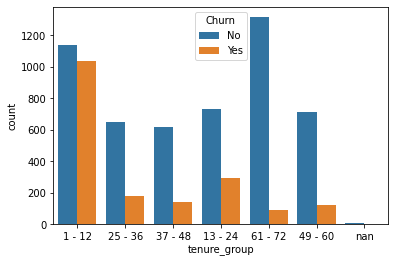

In [19]:
for i in cat:
    sb.countplot(df1[i],hue=df1['Churn'])
    plt.show()

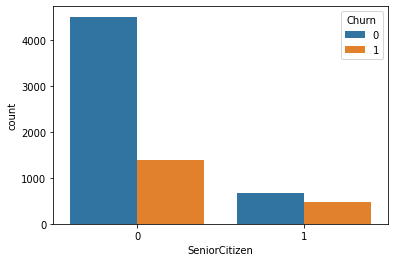

In [43]:
sb.countplot(df1['SeniorCitizen'],hue=df1['Churn'])
plt.show()

In [20]:
df1['Churn'] = np.where(df1.Churn == 'Yes',1,0)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

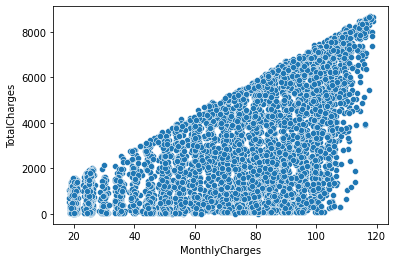

In [21]:
sb.scatterplot(df1.MonthlyCharges,df1.TotalCharges)

Text(0.5, 1.0, 'Monthly charges by churn')

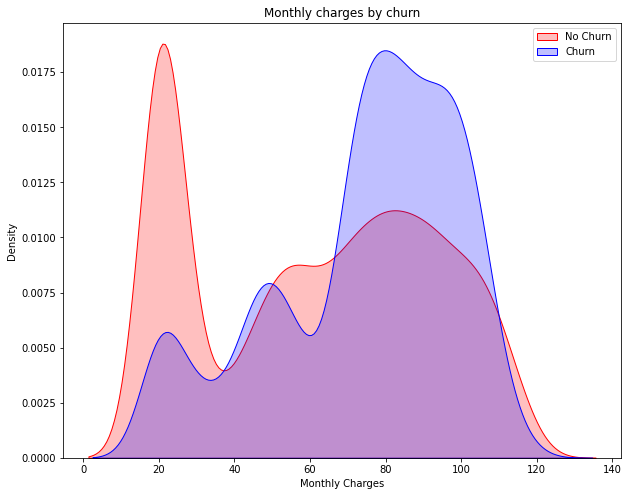

In [23]:
plt.figure(figsize=(10,8))
sb.kdeplot(df1.MonthlyCharges[(df1['Churn']==0)],color='red',shade=True)
sb.kdeplot(df1.MonthlyCharges[(df1['Churn']==1)],color='blue',shade=True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

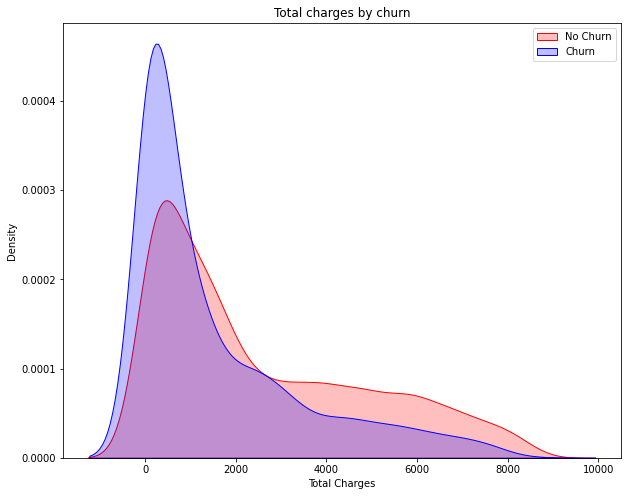

In [24]:
plt.figure(figsize=(10,8))
sb.kdeplot(df1.TotalCharges[(df1['Churn']==0)],color='red',shade=True)
sb.kdeplot(df1.TotalCharges[(df1['Churn']==1)],color='blue',shade=True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Total charges by churn')

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [25]:
df1_cat=pd.get_dummies(df1[cat])

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1_num=pd.DataFrame(ss.fit_transform(df1[con]),columns=con)

In [27]:
df1_scaled=pd.concat([df1_num,df1_cat],axis=1)

In [28]:
df1_scaled

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,tenure_group_nan
0,-0.439916,-1.160323,-0.992611,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0
1,-0.439916,-0.259629,-0.172165,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,-0.439916,-0.362660,-0.958066,1,0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,-0.439916,-0.746535,-0.193672,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.439916,0.197365,-0.938874,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,0.665992,-0.127605,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7039,-0.439916,1.277533,2.242606,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
7040,-0.439916,-1.168632,-0.852932,0,1,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
7041,2.273159,0.320338,-0.870513,1,0,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0


# Correlation plot

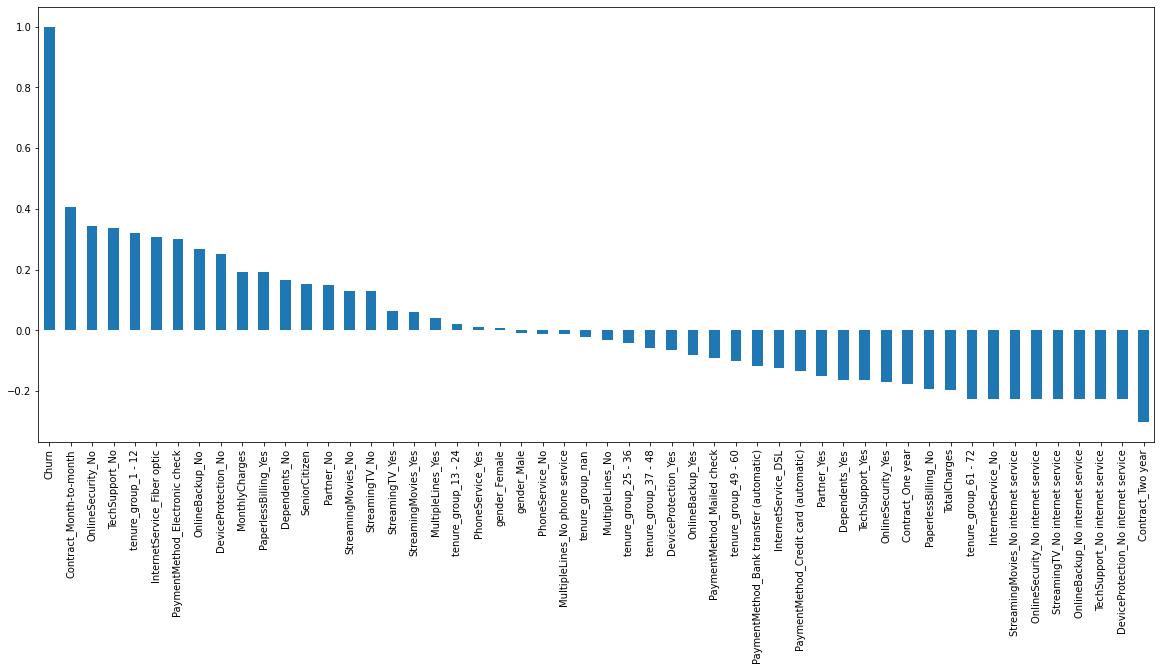

In [40]:
plt.figure(figsize=(20,8))
df1_scaled.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

# Model building

In [46]:
X=df1_scaled
Y=df1['Churn']

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [59]:
models= {
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "RandomForestClassifier":RandomForestClassifier(),
          "LogisticRegression":LogisticRegression(),
          "AdaboostClassifier": AdaBoostClassifier(DecisionTreeClassifier()) 
} 

In [60]:
for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(xtrain,ytrain)
        
        #make predictions
        ytrain_pred=model.predict(xtrain)
        ytest_pred=model.predict(xtest)
        
        #training set performance
        model_train_accuracy=accuracy_score(ytrain,ytrain_pred)
        model_train_f1=f1_score(ytrain,ytrain_pred,average="weighted")
        model_train_precision=precision_score(ytrain,ytrain_pred)
        model_train_recall=recall_score(ytrain,ytrain_pred)
        
        #testing set performances
        model_test_accuracy=accuracy_score(ytest,ytest_pred)
        model_test_f1=f1_score(ytest,ytest_pred,average="weighted")
        model_test_precision=precision_score(ytest,ytest_pred)
        model_test_recall=recall_score(ytest,ytest_pred)
        
        print(list(models.keys())[i])
        
        
        print('Model performances for trainig set')
        print('Accuracy :{:.4f}'.format(model_train_accuracy))
        print('F1_score :{:.4f}'.format(model_train_f1))
        print('Precision_score :{:.4f}'.format(model_test_precision))
        print('Recall :{:.4f}'.format(model_test_recall))
        
        print('----------------------------------')
        
        print('Model performances for testing set')
        print('Accuracy :{:.4f}'.format(model_test_accuracy))
        print('F1_score :{:.4f}'.format(model_test_f1))
        print('Precision_score :{:.4f}'.format(model_test_precision))
        print('Recall :{:.4f}'.format(model_test_recall))
        
        print("="*40)
        print("\n")

DecisionTreeClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
Precision_score :1.0000
Recall :1.0000
----------------------------------
Model performances for testing set
Accuracy :1.0000
F1_score :1.0000
Precision_score :1.0000
Recall :1.0000


RandomForestClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
Precision_score :1.0000
Recall :1.0000
----------------------------------
Model performances for testing set
Accuracy :1.0000
F1_score :1.0000
Precision_score :1.0000
Recall :1.0000


LogisticRegression
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
Precision_score :1.0000
Recall :1.0000
----------------------------------
Model performances for testing set
Accuracy :1.0000
F1_score :1.0000
Precision_score :1.0000
Recall :1.0000


AdaboostClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
Precision_score :1.0000
Recall :1.0000
----------------------------------
Model performa